In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from collections import Counter

In [3]:
df = pd.read_csv("survey_results_public.csv", index_col="Respondent", usecols=["Respondent","MainBranch", "LanguageWorkedWith"]).dropna(how="all")
df["MainBranch"] = df["MainBranch"].astype("category")
df["data"] = df["LanguageWorkedWith"].str.split(";")
df.head()

,MainBranch,LanguageWorkedWith,data
Respondent,,,
1,I am a student who is learning to code,HTML/CSS;Java;JavaScript;Python,"[HTML/CSS, Java, JavaScript, Python]"
2,I am a student who is learning to code,C++;HTML/CSS;Python,"[C++, HTML/CSS, Python]"
3,"I am not primarily a developer, but I write co...",HTML/CSS,[HTML/CSS]
4,I am a developer by profession,C;C++;C#;Python;SQL,"[C, C++, C#, Python, SQL]"
5,I am a developer by profession,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,"[C++, HTML/CSS, Java, JavaScript, Python, SQL,..."


In [4]:
data_counter = Counter()
for row in df["LanguageWorkedWith"].dropna():
    data_counter.update(row.split(';'))

data_index = []
data_values = []
for item in data_counter.most_common(15):
    data_index.append(item[0])
    data_values.append(item[1])

sum(data_counter.values())

440505

In [5]:
data_counter_pro = Counter()

for row in df.groupby("MainBranch").get_group("I am a developer by profession")["LanguageWorkedWith"].dropna():
    data_counter_pro.update(row.split(';'))

data_index_pro = []
data_values_pro = []

for item in data_counter_pro.most_common(15):
    data_index_pro.append(item[0])
    data_values_pro.append(item[1])

sum(data_counter_pro.values())

329945

<h1 style='color:red'>FUNCTIONS</h1>

In [6]:
def insert_data_labels(bars, data, position):
    for bar in bars:
        bar_width = bar.get_width()
        percent = f"({bar_width:,} - {bar_width*100/sum(data):1.1f}%)" 

        # ax.annotate('{0:.0f}'.format(bar_width),
        # ax.annotate("{:,}".format(bar_width),
        ax.annotate(percent,
            xy=(bar_width+position, bar.get_y() + bar.get_height() / 2),
            textcoords='data',
            ha='center', va='center')

def bar_color(data, limit):
    colors = []
    for i in data:
        if i > limit:
            colors.append('red')
        else:
            colors.append('gray')
    return colors

<h1 style='color:red'>GRAPH-1</h1>

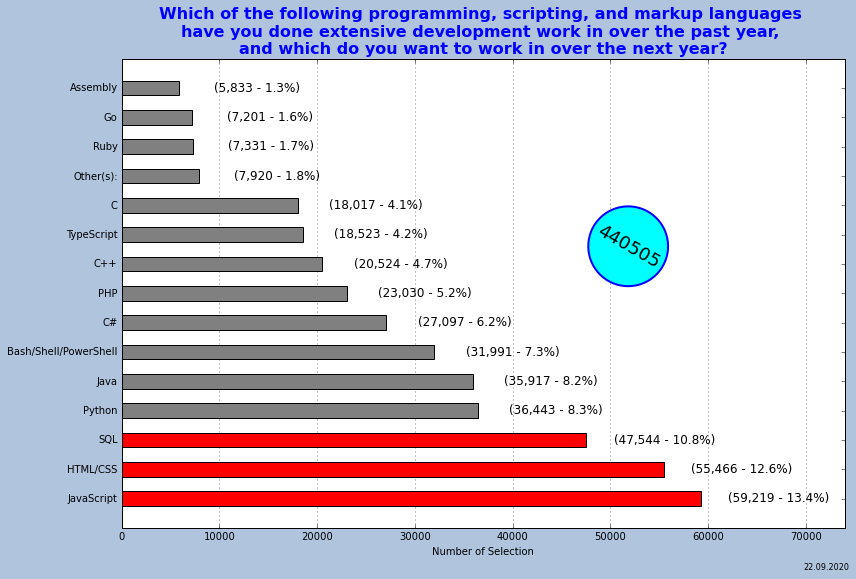

In [11]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 8), facecolor='lightsteelblue')
plt.figtext(0.99, 0, "22.09.2020", horizontalalignment='right', size=8, weight='light')
matplotlib.style.use('classic')
######################
colors = bar_color(data_values, 40000) #------function
# cmap_red = plt.get_cmap('Reds')
# colors = cmap_red(np.linspace(0.8, 0.2, len(data_index)))
bar_width = 0.50
bar_a = ax.barh(data_index, data_values, bar_width, color=colors, zorder=3)
insert_data_labels(bar_a, data_counter.values(), 8000) #------function
# Circle
bbox_props = dict(boxstyle="circle,pad=0.3", fc="cyan", ec="b", lw=2)
ax.text(0.7, 0.6, sum(data_counter.values()), ha="center", va="center", rotation=-30, size=18, transform=ax.transAxes,
            bbox=bbox_props)
#---------------------------------------------------------------#
ax.grid(axis='x', zorder=0)
ax.set_xlim([0, max(list(data_counter.values()))*1.25])
ax.set_ylim([-1, len(data_index)])
######################
plt.title("Which of the following programming, scripting, and markup languages \nhave you done extensive development work in over the past year, \nand which do you want to work in over the next year?", fontsize=16, color='b', weight='bold')
plt.xlabel("Number of Selection")
plt.tight_layout()
plt.show()

<h1 style='color:red'>GRAPH-2</h1>

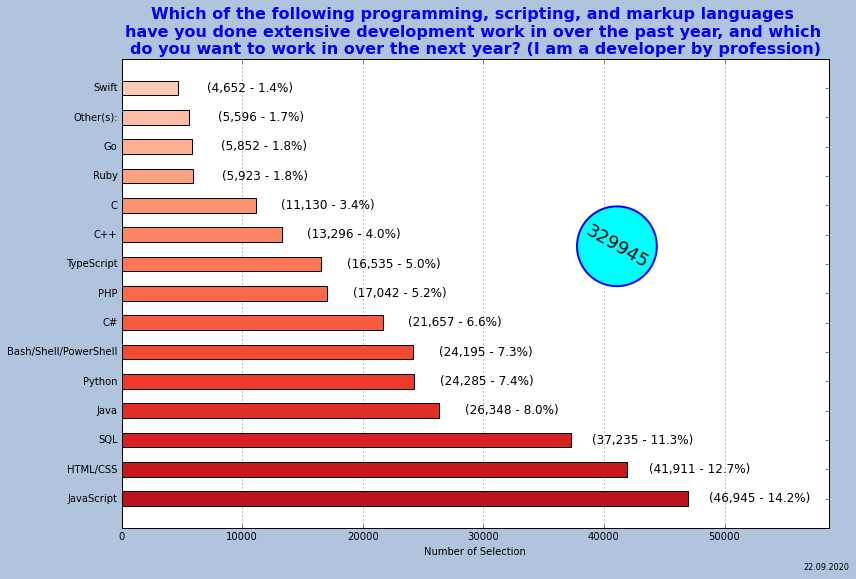

In [13]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 8), facecolor='lightsteelblue')
plt.figtext(0.99, 0, "22.09.2020", horizontalalignment='right', size=8, weight='light')
matplotlib.style.use('classic')
######################
# colors_pro = bar_color(data_values_pro, 30000) #------function
cmap_red = plt.get_cmap('Reds')
colors_pro = cmap_red(np.linspace(0.8, 0.2, len(data_index)))
bar_width_pro = 0.50
bar_a_pro = ax.barh(data_index_pro, data_values_pro, bar_width_pro, color=colors_pro, zorder=3)
insert_data_labels(bar_a_pro, data_counter_pro.values(), 6000) #------function
# Circle
bbox_props = dict(boxstyle="circle,pad=0.3", fc="cyan", ec="b", lw=2)
ax.text(0.7, 0.6, sum(data_counter_pro.values()), ha="center", va="center", rotation=-30, size=18, transform=ax.transAxes,
            bbox=bbox_props)
#---------------------------------------------------------------#
ax.grid(axis='x', zorder=0)
ax.set_xlim([0, max(list(data_counter_pro.values()))*1.25])
ax.set_ylim([-1, len(data_index_pro)])
######################
plt.title("Which of the following programming, scripting, and markup languages \nhave you done extensive development work in over the past year, and which \ndo you want to work in over the next year? (I am a developer by profession)", fontsize=16, color='b', weight='bold')
plt.xlabel("Number of Selection")
plt.tight_layout()
plt.show()